In [ ]:
import tensorflow as tf
from math import pi
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
im = np.array([
    
    [0, 0.5, 0.5, 0],
    [0.5, 1, 1, 0.5],
    [0.5, 1, 1, 0.5],
    [0, 0.5, 0.5, 0]
])



flattened = im.flatten()

in_dims = flattened.shape[0]
out_dims = 10

weights = np.random.rand(in_dims*out_dims).reshape((in_dims, out_dims))

print(weights.shape)

plt.imshow(im, cmap="grey")



np.dot(flattened, weights)

In [ ]:
data = np.zeros((10, 4))

layer = tf.keras.layers.Dense(10)

layer(data).shape

In [ ]:
data = np.zeros((10, 4))

in_features = data.shape[1]
out_features = 5


weights = np.random.rand(in_features * out_features).reshape(in_features, out_features)

predictions = np.dot(data, weights)
print(predictions.shape)


In [ ]:
data = np.zeros((10, 4))

in_features = data.shape[1]
out_features = 5


weights = np.random.rand(in_features * out_features).reshape(in_features, out_features)

predictions = np.dot(data, weights)
print(predictions.shape)


In [ ]:
# Non batch
data = np.zeros((4))

in_features = data.shape[0]
out_features = 5


weights = np.random.rand(in_features * out_features).reshape(in_features, out_features)
print(weights)
predictions = np.dot(data, weights)
print(predictions.shape)


In [ ]:
x = tf.Variable([0.0, pi/2, pi])
with tf.GradientTape() as g:
  g.watch(x)
  y = tf.sin(x)
dy_dx = g.gradient(y, x)
print(dy_dx)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from time import sleep

def mean_squared_error(x, y):
    return tf.reduce_mean(x**2 - y**2)

g1 = tf.random.Generator.from_seed(1)
im = tf.constant([[0.0, 1.0, 0.0],
                  [1.0, 4.0, 1.0],
                  [0.0, 1.0, 0.0]])
x_start = g1.normal(shape=im.shape)
x = x_start

rate = -0.1
steps = 10
history = []
for i in range(steps):
    with tf.GradientTape() as g:
        g.watch(x)
        y = (x-im)**2
    dy_dx = g.gradient(y, x)
    x = x + dy_dx * rate
    history.append(x)


fig, ax = plt.subplots(1, steps+2)
ax[0].imshow(im)
ax[1].imshow(x_start)
for i, step in enumerate(history):
    ax[i+2].imshow(step)


#     with tf.GradientTape() as g:
#         g.watch(x)
#         y = func(x)
#     dy_dx = g.gradient(y, x)

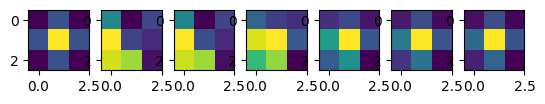

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
from time import sleep

def mean_squared_error(x, y):
    return tf.reduce_mean((x - y)**2)

g1 = tf.random.Generator.from_seed(1)
im = tf.constant([[0.0, 1.0, 0.0],
                  [1.0, 4.0, 1.0],
                  [0.0, 1.0, 0.0]])
estimation_start = g1.normal(shape=im.shape)
estimation = estimation_start

rate = .1
steps = 100
history = []
for i in range(steps):
    with tf.GradientTape() as g:
        g.watch(estimation)
        y = mean_squared_error(im, estimation)
    gradient = g.gradient(y, estimation)
    estimation = estimation - gradient * rate
    if i % (steps/5) == 0:
        history.append(estimation)


fig, ax = plt.subplots(1, 2 + len(history))
ax[0].imshow(im)
ax[1].imshow(estimation_start)
for i, step in enumerate(history):
    ax[i+2].imshow(step)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from time import sleep

def mean_squared_error(x, y):
    return tf.reduce_mean((x - y)**2)

g1 = tf.random.Generator.from_seed(1)
im = tf.constant([[0.0, 1.0, 0.0],
                  [1.0, 4.0, 1.0],
                  [0.0, 1.0, 0.0]])
estimation_start = g1.normal(shape=im.shape)
estimation = estimation_start

rate = .1
steps = 100
history = []
for i in range(steps):
    with tf.GradientTape() as g:
        g.watch(estimation)
        y = mean_squared_error(im, estimation)
    gradient = g.gradient(y, estimation)
    estimation = estimation - gradient * rate
    if i % (steps/5) == 0:
        history.append(estimation)


fig, ax = plt.subplots(1, 2 + len(history))
ax[0].imshow(im)
ax[1].imshow(estimation_start)
for i, step in enumerate(history):
    ax[i+2].imshow(step)